In [422]:
#파일 read/그래프작성
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
#선형회귀
from sklearn.linear_model import LinearRegression, SGDRegressor
#warning off
import warnings
warnings.filterwarnings('ignore')
#X 컬럼 값 변경
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#테스트값분리-랜덤값 다양한 학습가능
from sklearn.model_selection import train_test_split

In [423]:
#데이터 불러오기
dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
dataset.head()

,hour,absent,place,score
0,0.5,3,Home,10
1,1.2,4,Library,8
2,1.8,2,Cafe,14
3,2.4,0,Cafe,26
4,2.6,2,Home,22


In [424]:
#데이터셋 X,y 설정
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X.shape ,y.shape

((20, 3), (20,))

In [425]:
#컬럼값 0/1 변경
ct = ColumnTransformer(
    transformers=[('encoder',OneHotEncoder(drop='first'),[2])],
    remainder='passthrough'
)
X_trans = ct.fit_transform(X)
X_trans[:5], X[:5]

(array([[1.0, 0.0, 0.5, 3],
        [0.0, 1.0, 1.2, 4],
        [0.0, 0.0, 1.8, 2],
        [0.0, 0.0, 2.4, 0],
        [1.0, 0.0, 2.6, 2]], dtype=object),
 array([[0.5, 3, 'Home'],
        [1.2, 4, 'Library'],
        [1.8, 2, 'Cafe'],
        [2.4, 0, 'Cafe'],
        [2.6, 2, 'Home']], dtype=object))

In [426]:
#테스트데이터분리
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)
X_trans.shape, X_train.shape, X_test.shape

((20, 4), (16, 4), (4, 4))

In [427]:
#선형회귀
reg = LinearRegression()
reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [428]:
#예측(train값)
y_pred = reg.predict(X_train)
y_pred, y_train

(array([57.22323961, 85.29111777, 44.89686182, 67.18859687, 23.30478412,
        20.80855613, 32.83130336, 67.18450992, 55.74398206, 50.09895946,
        76.99121064, 65.70933932, 30.33507537, -0.186027  , 64.75882175,
        61.8196688 ]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62]))

In [429]:
#예측(test값)-노이즈값 확인
y_pred = reg.predict(X_test)
y_pred, y_test

(array([ 92.15457859,  10.23753043, 108.36245302,  38.14675204]),
 array([ 90,   8, 100,  38]))

In [430]:
#기울기/절편 (집/도서관/카페(0),공부시간,결석횟수 기울기)
reg.coef_, reg.intercept_

(array([-5.82712824, -1.04450647, 10.40419528, -1.64200104]),
 np.float64(5.3650067065447615))

In [431]:
X_train[0]

array([0.0, 0.0, 5.3, 2], dtype=object)

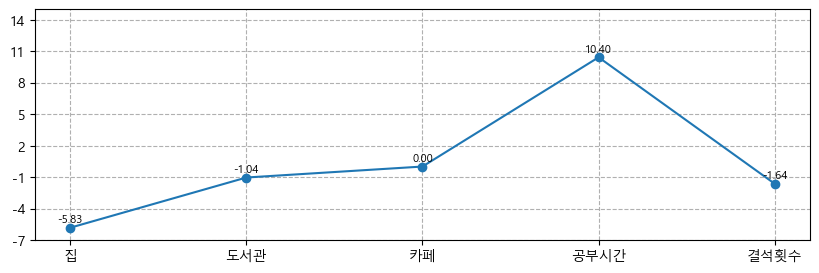

In [432]:
#기울기값 바그래프 (#기울기가 클수록 영향^)
x=['집','도서관','카페','공부시간','결석횟수']
y=[reg.coef_[0],reg.coef_[1],0,reg.coef_[2],reg.coef_[3] ]
plt.figure(figsize=(10,3))
plt.plot(x,y, marker='o')
plt.grid(True, ls='--')
plt.ylim(-7,15)
for idx in range(len(x)):
    plt.text(idx, y[idx]+0.5, f'{y[idx]:.2f}', ha='center', size=8)
plt.yticks([y for y in range(-7,15,3)])
plt.show()

In [433]:
#다중선형회귀 모델 생성 함수
def model_multi():
    import pandas as pd
    dataset = pd.read_csv('data/MultipleLinearRegressionData.csv')
    X=dataset.iloc[:,:-1].values
    y=dataset.iloc[:,-1].values
    
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    ct = ColumnTransformer(
    transformers=[('encoder',OneHotEncoder(drop='first'),[2])],
    remainder='passthrough')
    X_trans = ct.fit_transform(X)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

    from sklearn.linear_model import LinearRegression
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    return reg

In [434]:
#모델생성
model = model_multi()

In [435]:
#예측: 집-도서관-카페-9시간 공부-결석1회시 점수
pred = model.predict([[1,0,9,1], [0,1,9,1], [0,0,9,1]])
print(pred[0], pred[1], pred[2])

91.53363493726826 96.31625670242525 97.36076317293518


In [436]:
#장소 문자-숫자전환 예측을 위한 사전값 설정
dict = {'집':[1,0], '도서관':[0,1], '카페':[0,0]}
place = '집'
p1= dict.get(place)[0]
p2= dict.get(place)[1]
hour=9
absent=1

model.predict([[p1,p2,hour,absent]])

array([91.53363494])

In [437]:
#예측함수
def predict(place, hour, absent):
    dict = {'집':[1,0], '도서관':[0,1], '카페':[0,0]}
    p1= dict.get(place)[0]
    p2= dict.get(place)[1]
    pred = model.predict([[p1,p2,hour,absent]])
    print(f'장소:{place}, 공부시간:{hour}, 결석횟수:{absent}, 예측점수:{pred[0]:.2f}점')

In [438]:
predict('집', 9, 1)

장소:집, 공부시간:9, 결석횟수:1, 예측점수:91.53점


In [439]:
#모델 잘 생성 여부 확인 (1에 가까울수록*좋은점수)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9623352565265527, 0.9859956178877446)

In [440]:
def place(x0,x1):
        dict = {'10':'집','01':'도서관', '00':'카페'}
        x0 = int(x0)
        x1 = int(x1)
        x = f'{x0}{x1}'
        return dict[x]
place(0,0)

'카페'

In [441]:

xticks = [f'장소:{place(x[0],x[1])}(시간:{x[2]}, 결석:{x[3]})' for x in X_train]
xticks

['장소:카페(시간:5.3, 결석:2)',
 '장소:집(시간:8.4, 결석:1)',
 '장소:도서관(시간:3.9, 결석:0)',
 '장소:카페(시간:6.1, 결석:1)',
 '장소:집(시간:2.6, 결석:2)',
 '장소:카페(시간:1.8, 결석:2)',
 '장소:집(시간:3.2, 결석:0)',
 '장소:도서관(시간:6.2, 결석:1)',
 '장소:카페(시간:5.0, 결석:1)',
 '장소:도서관(시간:4.4, 결석:0)',
 '장소:카페(시간:7.2, 결석:2)',
 '장소:카페(시간:5.8, 결석:0)',
 '장소:카페(시간:2.4, 결석:0)',
 '장소:집(시간:0.5, 결석:3)',
 '장소:집(시간:6.9, 결석:4)',
 '장소:도서관(시간:6.0, 결석:3)']

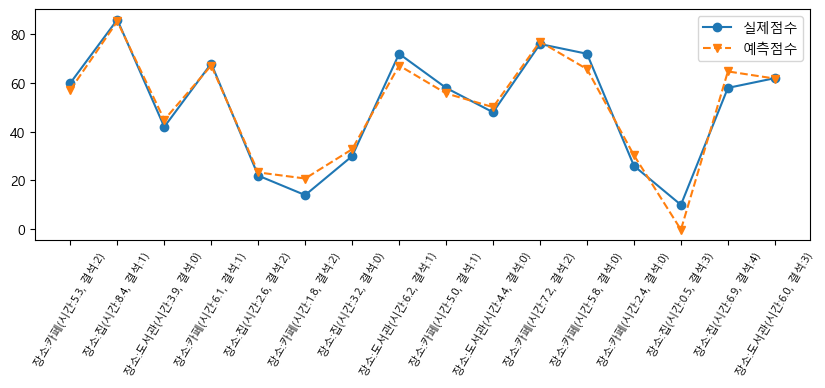

In [442]:
x = [idx for idx,x in enumerate(X_train)]
plt.figure(figsize=(10,3))
plt.plot(x, y_train, marker='o', label='실제점수')
plt.plot(x, reg.predict(X_train), ls='--', marker='v', label='예측점수')
xticks = [f'장소:{place(x[0],x[1])}(시간:{x[2]}, 결석:{x[3]})' for x in X_train]
plt.xticks(x,xticks, size=8, rotation=60)
plt.legend()
plt.show()

In [443]:
#임의데이터 예측점수구하기
df = pd.read_csv('data/다중선형회귀.csv')
# df['예측점수']=0
df.head()

,name,hour,absent,place
0,홍길동,10.0,3,Home
1,심청이,8.5,4,Library
2,강감찬,5.5,2,Cafe
3,성춘향,2.4,0,Cafe
4,김길동,2.6,2,Home


In [444]:
#예측모델
pred_y = model.predict(X_train)
pred_y

array([57.22323961, 85.29111777, 44.89686182, 67.18859687, 23.30478412,
       20.80855613, 32.83130336, 67.18450992, 55.74398206, 50.09895946,
       76.99121064, 65.70933932, 30.33507537, -0.186027  , 64.75882175,
       61.8196688 ])

In [445]:
#임의데이터 변수값확인-장소 변환
X_df = df.iloc[:,1:4].values
X_df[:1]

array([[10.0, 3, 'Home']], dtype=object)

In [446]:
ct = ColumnTransformer(
transformers=[('encoder',OneHotEncoder(drop='first'),[2])],
remainder='passthrough')
X_trans = ct.fit_transform(X_df)

In [447]:
X_trans

array([[1.0, 0.0, 10.0, 3],
       [0.0, 1.0, 8.5, 4],
       [0.0, 0.0, 5.5, 2],
       [0.0, 0.0, 2.4, 0],
       [1.0, 0.0, 2.6, 2],
       [1.0, 0.0, 3.2, 0],
       [0.0, 1.0, 9.5, 0],
       [0.0, 1.0, 6.9, 0],
       [1.0, 0.0, 4.5, 5],
       [0.0, 0.0, 9.7, 1]], dtype=object)

In [448]:
y_pred = reg.predict(X_trans)
df_y=pd.DataFrame(y_pred)
df_y.head()

,0
0,98.653828
1,86.188156
2,59.304079
3,30.335075
4,23.304784


In [450]:
join = df.join(df_y)
join.rename(columns={0:'예측점수'})

,name,hour,absent,place,예측점수
0,홍길동,10.0,3,Home,98.653828
1,심청이,8.5,4,Library,86.188156
2,강감찬,5.5,2,Cafe,59.304079
3,성춘향,2.4,0,Cafe,30.335075
4,김길동,2.6,2,Home,23.304784
5,이순신,3.2,0,Home,32.831303
6,조인성,9.5,0,Library,103.160355
7,송혜교,6.9,0,Library,76.109448
8,송중기,4.5,5,Home,38.146752
9,김혜수,9.7,1,Cafe,104.643700
